In [1]:
import numpy as np
import math
import csv
from proj1_helpers import *
from Hadrien import *
from ML_methods import *
from features_engineering import *
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [24]:
y, tx, ids = load_csv_data("data_csv/train.csv", sub_sample=True)
#y = change_y_boundaries(y)
print("y has shape {0}".format(y.shape))
print("X has shape {0}".format(tx.shape))

y has shape (5000,)
X has shape (5000, 30)


# Data Set Analysis

## Spy Nan Values
White is NAN, black is finite value

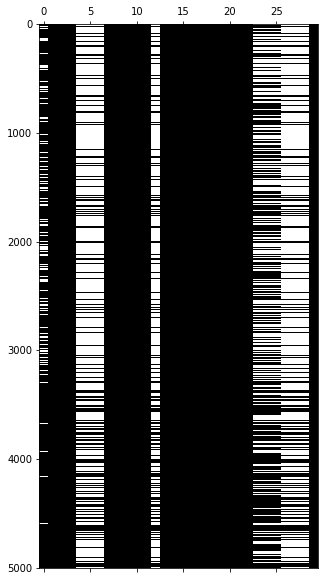

In [25]:
NAN_values_overview_matrix(tx, y)

## Feature Engineering

### Spy basic Feature
In this anaylsis, we aim to diplay the feature distributions. The NAN values will be ignored.

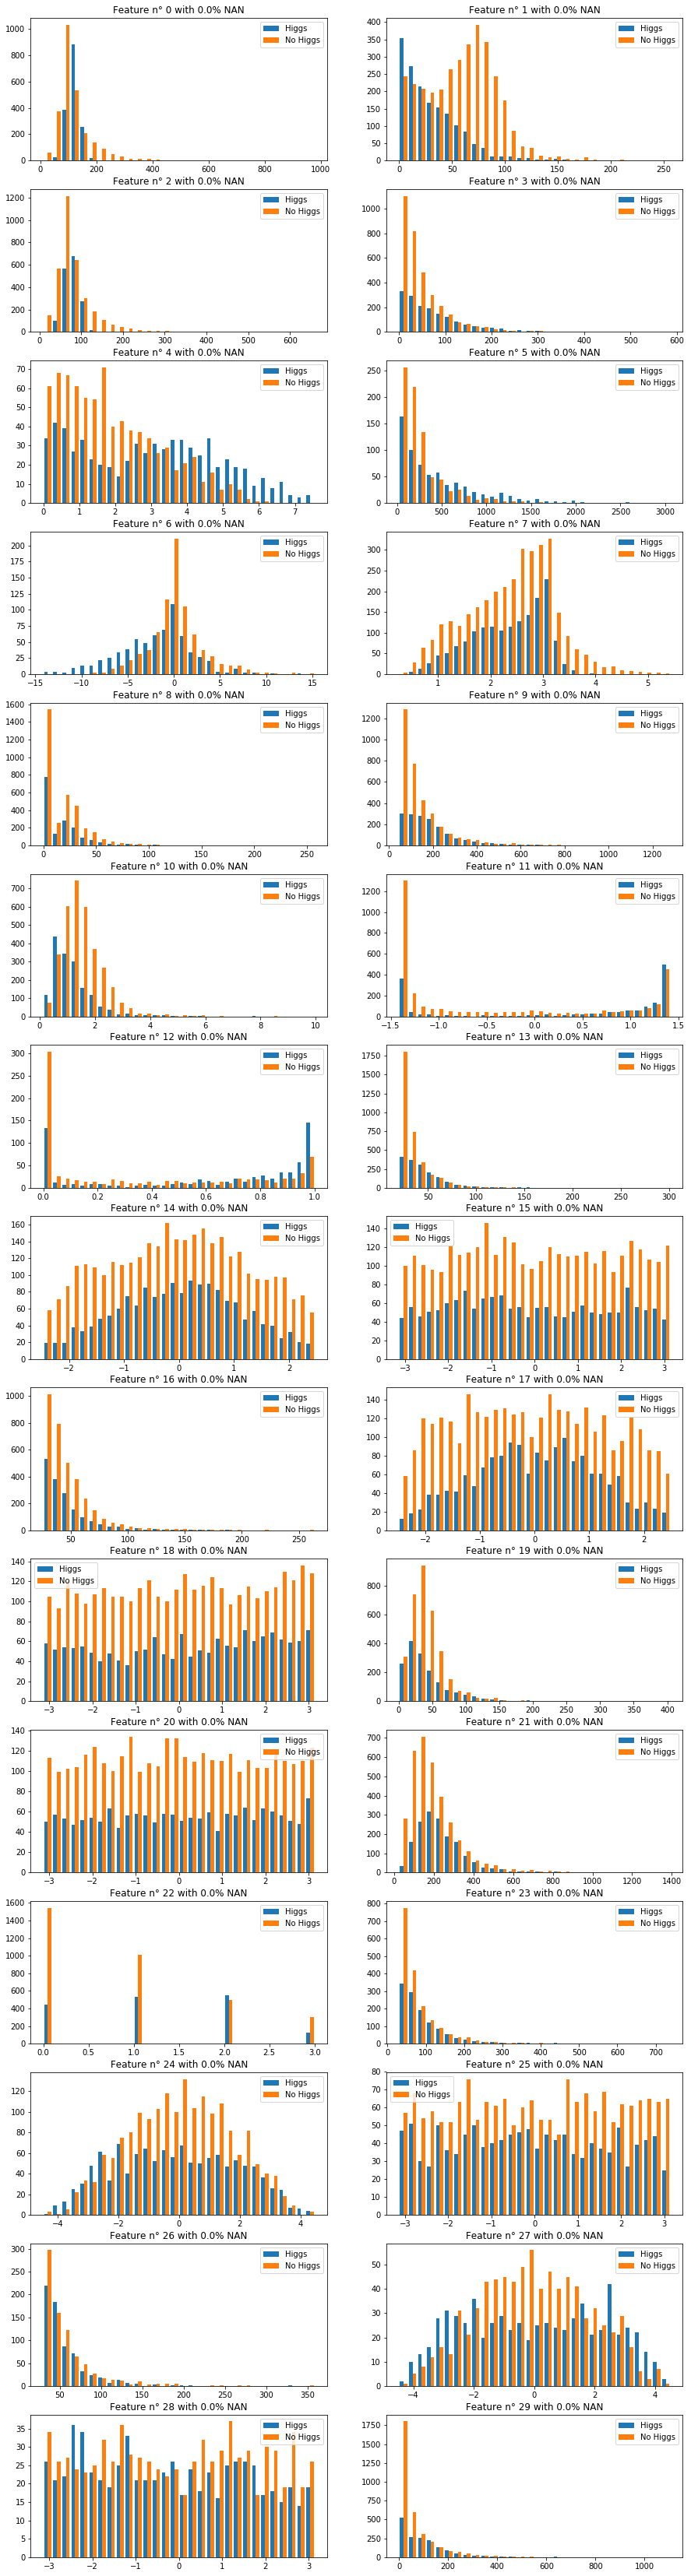

In [26]:
display_feature_distribution(y, tx, 30)

### NAN values processing

Transform Unknow values to NAN

In [27]:
tx_nan = transform_to_nan(tx, -900)

Add bool columns for NAN patterns

In [28]:
nan_columns_patterns = [0, 4, 23]
tx_nan_bool = add_bool_when_nan(tx_nan, nan_columns_patterns)

Put NAN values to mean

In [29]:
tx_nan_mean, mean = transform_to_mean(tx_nan_bool)

### Transform to log scale

We apply square transformation to column 6 so it will have exp distribution.
Columns number [0, 2, 3, 5, 8, 9, 10, 13, 16, 19, 21, 23, 26, 29] seems to have exp distribution. Therefore, we will apply log.

In [8]:
features_square = [6]
tx_square = transform_feature_power(tx_nan_mean, features_square, 2)

In [9]:
features_log = [0, 2, 3, 5, 6, 8, 9, 10, 13, 16, 19, 21, 23, 26, 29]
tx_log = transform_feature_log(tx_square, features_log)

### Decompose angles
Features [11, 12, 14, 15, 17] are angles in [rad]. It is a good idea to decompose angles in cos/sin/tan/arccos/arcsin/arctan. Here np.sin() is good for feature 11 and 12, for the rest, we should find another function

In [10]:
features_sin = [11, 12, 14, 15, 17]
tx_angle_stand = standardize_angles(tx_log, features_sin)
tx_sin = transform_feature_sin(tx_angle_stand, features_sin)

### Combine Columns and polynomial

### Standardize features
We standardize only the functions that have contineous spectrum

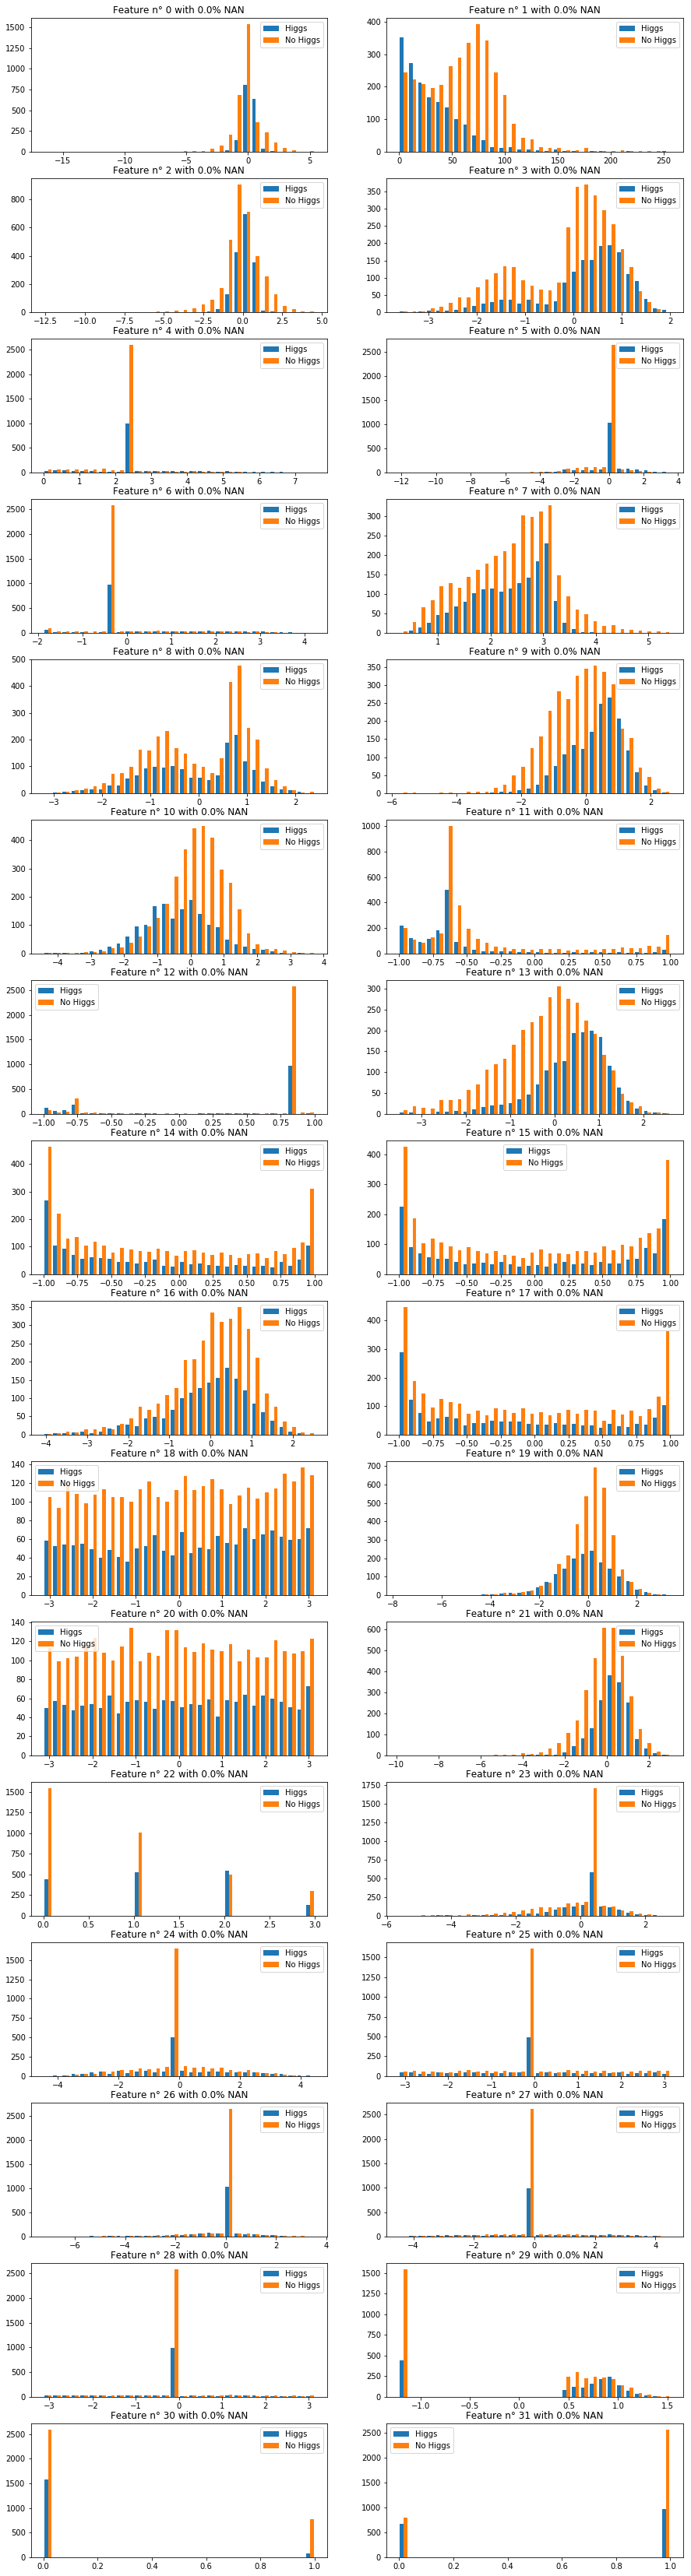

In [11]:
feature_std = features_log
tx_std, mean, std = standardize_features(tx_sin, feature_std)
display_feature_distribution(y, tx_std[:,:-1], 30)

### Feature 22

In [12]:
tx_22plus0 = new_feature_PRI_jet_num(tx_std, 0.0)
tx_22plus1 = new_feature_PRI_jet_num(tx_22plus0, 1.0)
tx_22plus2 = new_feature_PRI_jet_num(tx_22plus1, 2.0)
tx_22plus3 = new_feature_PRI_jet_num(tx_22plus2, 3.0)

### Remove useless features
Features [14, 15, 17, 18, 20, 25, 28] have shity distributions. We remove them

In [13]:
features_removed = [14, 15, 17, 18, 20, 22, 25, 28]
tx_removed = np.delete(tx_22plus3, features_removed, axis = 1)
tx_removed.shape

(5000, 29)

### Check Correlation with labels

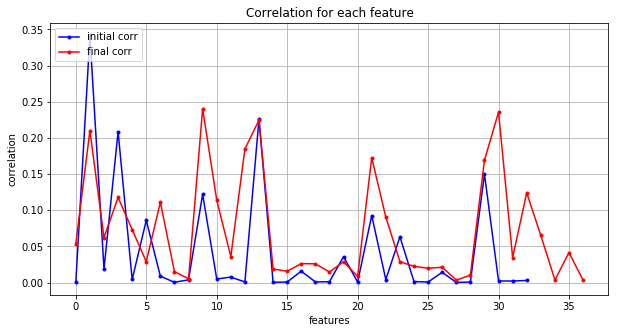

In [14]:
from correlation import *

y_modfied = change_y_boundaries(y)

corr1 = compute_corr_features(y, tx_nan_mean,  'all')
corr2 = compute_corr_features(y, tx_22plus3, 'all')
plt.figure(figsize=(10,5))
plt.plot(list(range(len(corr1))), np.abs(corr1), marker=".", color='b', label='initial corr')
plt.plot(list(range(len(corr2))), np.abs(corr2), marker=".", color='r', label='final corr')
plt.xlabel("features")
plt.ylabel("correlation")
plt.title("Correlation for each feature")
plt.legend(loc=2)
plt.grid(True)


# Train model 

### Train and Test models on small dataset

In [15]:
tx_train.shape

NameError: name 'tx_train' is not defined

Gradient Descent, Loss : 0.724, Lambda : 0.0003792690190732246
Stochastic Gradient Descent, Loss : 0.702, Lambda : 0.0003792690190732246
Ridge Resgression, Loss : 0.69, Lambda : 0.0001


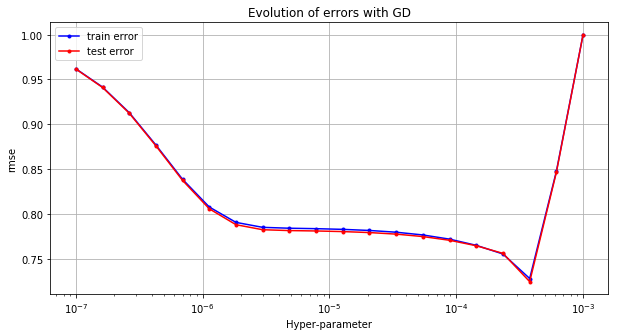

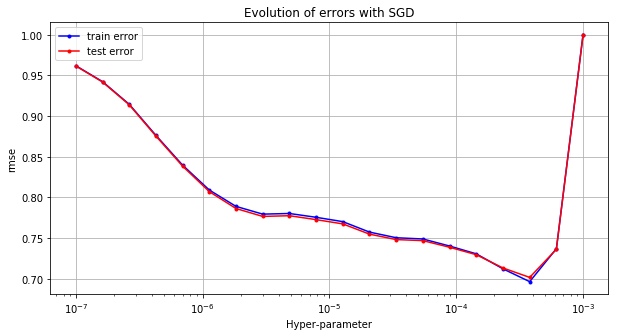

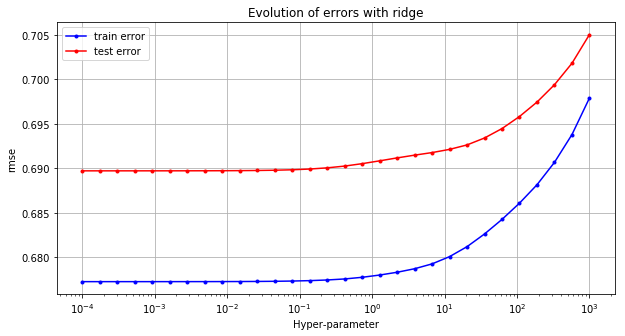

In [16]:
from train_model import *

tx_train = tx_removed


initial_w = np.zeros(tx_train.shape[1])
max_iter = 500
batch_size = 100

gradient_descent_exploration(y, tx_train, 0.75, np.logspace(-7, -3, 20), initial_w, max_iter)
stochastic_gradient_descent_exploration(y, tx_train, 0.75, np.logspace(-7, -3, 20), initial_w, batch_size, max_iter)
ridge_regression_exploration(y, tx_train, 0.75, np.logspace(-4, 3, 30))

SGD(0/499): loss=0.6931471805599497, w0=4.353036428471779e-07, w1=-0.00011773945000000001
SGD(1/499): loss=0.6914468702142098, w0=5.505782325118273e-07, w1=-0.0002754663121409428
SGD(2/499): loss=0.6891905969766368, w0=8.674653086365295e-07, w1=-0.0004423464799901723
SGD(3/499): loss=0.6868282720606755, w0=1.2408271064962892e-06, w1=-0.0006226126326097087
SGD(4/499): loss=0.6843057444925851, w0=1.7675576918483736e-06, w1=-0.0007952631860618945
SGD(5/499): loss=0.681917537386043, w0=2.3154944755551696e-06, w1=-0.0009337516186578691
SGD(6/499): loss=0.6800224441741426, w0=1.725270904647492e-06, w1=-0.0010682833353297004
SGD(7/499): loss=0.6781984834907677, w0=2.4299248943491878e-06, w1=-0.001224152367666683
SGD(8/499): loss=0.6761065315680583, w0=2.9643153181179405e-06, w1=-0.0013257518433255813
SGD(9/499): loss=0.6747551461037979, w0=4.40155202974304e-06, w1=-0.0014170144527258042
SGD(10/499): loss=0.6735492488965696, w0=5.615482930915991e-06, w1=-0.0015591845205258014
SGD(11/499): loss

SGD(98/499): loss=0.5971564884319264, w0=5.770424789513171e-05, w1=-0.00940619253200464
SGD(99/499): loss=0.5968531549555034, w0=5.8283514095650196e-05, w1=-0.009464790339302283
SGD(100/499): loss=0.5964875739070223, w0=5.8363534908323713e-05, w1=-0.009531441001593132
SGD(101/499): loss=0.5960749231280356, w0=5.915652888934971e-05, w1=-0.009620398018051016
SGD(102/499): loss=0.5955304672766293, w0=5.9995415228547954e-05, w1=-0.009670444477066853
SGD(103/499): loss=0.5952261057492048, w0=5.977950977987522e-05, w1=-0.00975255724361129
SGD(104/499): loss=0.5947314870993358, w0=5.98423530057571e-05, w1=-0.009791850014559261
SGD(105/499): loss=0.5944960730893352, w0=6.076724439862643e-05, w1=-0.00984026911818278
SGD(106/499): loss=0.5942079458874865, w0=6.119849529517798e-05, w1=-0.009886832068763384
SGD(107/499): loss=0.5939327329421281, w0=6.225522641844238e-05, w1=-0.009917045901339683
SGD(108/499): loss=0.593754469303569, w0=6.293547542033299e-05, w1=-0.010011895262606742
SGD(109/499): 

SGD(196/499): loss=0.5753610494198381, w0=0.0001177329852514097, w1=-0.01416349967717262
SGD(197/499): loss=0.5752518336553072, w0=0.0001182723396434384, w1=-0.014137301507756913
SGD(198/499): loss=0.575327977829027, w0=0.00011861534751915895, w1=-0.014187784448881774
SGD(199/499): loss=0.5751801999433686, w0=0.00011932652293559041, w1=-0.014230955173965564
SGD(200/499): loss=0.5750551159745346, w0=0.00011991876774462609, w1=-0.014249674210476146
SGD(201/499): loss=0.5750009923536946, w0=0.0001201091076689558, w1=-0.014273455590427786
SGD(202/499): loss=0.5749324108942372, w0=0.00012059359656261717, w1=-0.014336641590312317
SGD(203/499): loss=0.5747532061565431, w0=0.0001219957244736101, w1=-0.014357322388315564
SGD(204/499): loss=0.5746943286698301, w0=0.00012260518552834385, w1=-0.014357110600925886
SGD(205/499): loss=0.5746938216268428, w0=0.0001232585981877483, w1=-0.014346963597846131
SGD(206/499): loss=0.5747212366742467, w0=0.00012355828377330727, w1=-0.014353380013692752
SGD(20

SGD(287/499): loss=0.5701402064165252, w0=0.00017137613695764222, w1=-0.016475089453449075
SGD(288/499): loss=0.5700785016443972, w0=0.00017226493057267918, w1=-0.016497202109817033
SGD(289/499): loss=0.5700440659381948, w0=0.00017300927998747145, w1=-0.016481851992216422
SGD(290/499): loss=0.5700663973574169, w0=0.00017382903666886306, w1=-0.016460515339178906
SGD(291/499): loss=0.5700983982707514, w0=0.0001743460940011858, w1=-0.01642888380953345
SGD(292/499): loss=0.5701463458690298, w0=0.0001746731107362648, w1=-0.016456249071282417
SGD(293/499): loss=0.5701030659721091, w0=0.00017557854382610637, w1=-0.01646018697851901
SGD(294/499): loss=0.5700956324415519, w0=0.00017658634148265127, w1=-0.016483862214677767
SGD(295/499): loss=0.5700580988047994, w0=0.0001769199610326438, w1=-0.016489989667531776
SGD(296/499): loss=0.5700480056472674, w0=0.00017721879980096575, w1=-0.016533385127124687
SGD(297/499): loss=0.5699821092063809, w0=0.00017770461934907533, w1=-0.016577914037950912
SGD(

SGD(383/499): loss=0.5687183789495196, w0=0.00023177056324752063, w1=-0.017554284607121714
SGD(384/499): loss=0.5686723280873723, w0=0.0002324427267935239, w1=-0.017589187457355784
SGD(385/499): loss=0.5686390356784548, w0=0.00023277250333692174, w1=-0.01760427101822805
SGD(386/499): loss=0.5686243744883871, w0=0.000233790199109242, w1=-0.01761742772669851
SGD(387/499): loss=0.5686118249559196, w0=0.00023463496353057155, w1=-0.01761380346889229
SGD(388/499): loss=0.5686142010450029, w0=0.00023548763229793722, w1=-0.01761946207116484
SGD(389/499): loss=0.5686080086225985, w0=0.00023629163797338432, w1=-0.017594667483624385
SGD(390/499): loss=0.5686294025499031, w0=0.00023696160013110044, w1=-0.017593056527653993
SGD(391/499): loss=0.5686300201980197, w0=0.0002374943217353964, w1=-0.017626627904580524
SGD(392/499): loss=0.5685989332714813, w0=0.00023781811387072371, w1=-0.017650368703858398
SGD(393/499): loss=0.5685770362186595, w0=0.0002383173263143442, w1=-0.017714378941065628
SGD(394/

SGD(477/499): loss=0.5680915062840786, w0=0.0002899412523103798, w1=-0.018232388749602757
SGD(478/499): loss=0.5680805148404764, w0=0.0002906744765549871, w1=-0.01821272935251334
SGD(479/499): loss=0.5680907503998626, w0=0.0002916444089094361, w1=-0.018217925792768895
SGD(480/499): loss=0.5680867245078319, w0=0.00029208376309537346, w1=-0.018182753207858983
SGD(481/499): loss=0.5681065261268381, w0=0.00029288787381446716, w1=-0.01817361934797253
SGD(482/499): loss=0.5681109550603523, w0=0.00029379118200735874, w1=-0.018186735604321866
SGD(483/499): loss=0.5681018736137224, w0=0.0002944525622528284, w1=-0.018219747523118814
SGD(484/499): loss=0.5680816293641987, w0=0.00029490677460803293, w1=-0.018221517326232374
SGD(485/499): loss=0.5680797943529238, w0=0.0002959271892565673, w1=-0.018183373000461807
SGD(486/499): loss=0.5681010006254038, w0=0.00029625479754912817, w1=-0.018201209677900204
SGD(487/499): loss=0.5680895194691666, w0=0.0002968998029178781, w1=-0.018235251458294695
SGD(488

SGD(75/499): loss=0.5873342264573205, w0=7.535409818896631e-05, w1=-0.011182458715316666
SGD(76/499): loss=0.5869268978965921, w0=7.540410980654584e-05, w1=-0.01132715292239748
SGD(77/499): loss=0.5862207513792095, w0=7.778277044621424e-05, w1=-0.011390899520055026
SGD(78/499): loss=0.5859129342222056, w0=7.832083318795748e-05, w1=-0.011540896079799152
SGD(79/499): loss=0.5852031270443636, w0=7.949543504771358e-05, w1=-0.01162506597668392
SGD(80/499): loss=0.58481122720655, w0=7.865912117446622e-05, w1=-0.011769624740362597
SGD(81/499): loss=0.5841508691545018, w0=7.89062854403589e-05, w1=-0.011919769801002168
SGD(82/499): loss=0.5834808765985546, w0=8.05775849367404e-05, w1=-0.01195523154924195
SGD(83/499): loss=0.583323917786551, w0=8.096044811996634e-05, w1=-0.012005705363123778
SGD(84/499): loss=0.583102499621474, w0=8.193557188249849e-05, w1=-0.012112166945077244
SGD(85/499): loss=0.5826429225294134, w0=8.324662674705349e-05, w1=-0.012154137601434797
SGD(86/499): loss=0.5824631896

SGD(168/499): loss=0.5718768503371325, w0=0.00017281928651164901, w1=-0.015486103705584526
SGD(169/499): loss=0.5718720938372462, w0=0.00017254878925918615, w1=-0.015489270699824507
SGD(170/499): loss=0.571863888633508, w0=0.00017379194135872937, w1=-0.015517587865730095
SGD(171/499): loss=0.5718034092618268, w0=0.00017513333256670405, w1=-0.015558199844598938
SGD(172/499): loss=0.5717174541784297, w0=0.00017591060048658056, w1=-0.01563222201289762
SGD(173/499): loss=0.5715649660857834, w0=0.00017643187759123347, w1=-0.015674009905318864
SGD(174/499): loss=0.571479410906499, w0=0.00017766105852822094, w1=-0.015622399645800379
SGD(175/499): loss=0.5715819493066124, w0=0.00018007561590572312, w1=-0.015620763826413508
SGD(176/499): loss=0.5715836635054538, w0=0.0001813140754150627, w1=-0.015685780169183733
SGD(177/499): loss=0.5714518347610881, w0=0.0001822244054689883, w1=-0.015700877726043613
SGD(178/499): loss=0.5714203245907872, w0=0.00018447192294027883, w1=-0.01570689363254295
SGD(1

SGD(262/499): loss=0.5690067736723562, w0=0.0002770404476686543, w1=-0.017210011192724813
SGD(263/499): loss=0.5689697386868635, w0=0.0002779099155433303, w1=-0.01723839649886431
SGD(264/499): loss=0.5689364897507913, w0=0.0002792051979243998, w1=-0.017279678573423683
SGD(265/499): loss=0.5688905285195406, w0=0.0002797681215366488, w1=-0.017310670045750192
SGD(266/499): loss=0.5688555293374715, w0=0.0002815805896271697, w1=-0.01730835364230889
SGD(267/499): loss=0.5688558200126508, w0=0.00028265391421705216, w1=-0.017285106785553603
SGD(268/499): loss=0.5688795474365879, w0=0.00028407509406201133, w1=-0.01728032528281171
SGD(269/499): loss=0.5688829360074165, w0=0.0002850860852355494, w1=-0.017294431175923743
SGD(270/499): loss=0.5688662378938848, w0=0.0002865239316968559, w1=-0.01727390478642059
SGD(271/499): loss=0.5688871236718482, w0=0.0002876572437308545, w1=-0.017330068059054494
SGD(272/499): loss=0.5688248228506608, w0=0.00028996294402174657, w1=-0.017353637148207264
SGD(273/499

SGD(354/499): loss=0.5681813039878736, w0=0.00038492723592632906, w1=-0.01787341822644616
SGD(355/499): loss=0.5682060394258353, w0=0.00038583692510127046, w1=-0.017899510200499645
SGD(356/499): loss=0.5681844135467642, w0=0.00038671944003501466, w1=-0.017878339816728046
SGD(357/499): loss=0.5681990996932011, w0=0.00038809726238816486, w1=-0.01786055529268205
SGD(358/499): loss=0.568211566319283, w0=0.00038932892552973254, w1=-0.017870393902997817
SGD(359/499): loss=0.5682030083361116, w0=0.0003895294375327089, w1=-0.017882348501961326
SGD(360/499): loss=0.5681917845496446, w0=0.00039181415688786163, w1=-0.017899640808013515
SGD(361/499): loss=0.5681771170762488, w0=0.0003927193963117341, w1=-0.017913385411815145
SGD(362/499): loss=0.5681658130532793, w0=0.0003935325976033745, w1=-0.017976213224174618
SGD(363/499): loss=0.5681187773338369, w0=0.00039501141357340097, w1=-0.018009334812328887
SGD(364/499): loss=0.5680934725894101, w0=0.00039545023800052433, w1=-0.017943250540681493
SGD(3

SGD(450/499): loss=0.567550754120541, w0=0.0004921089892605773, w1=-0.01886211685836984
SGD(451/499): loss=0.567546060867358, w0=0.0004934487488373776, w1=-0.018836621040327347
SGD(452/499): loss=0.5675517400994576, w0=0.000494359802547308, w1=-0.018883411819728142
SGD(453/499): loss=0.5675378722205522, w0=0.0004940627649938314, w1=-0.01894241295567584
SGD(454/499): loss=0.5675221104816041, w0=0.0004947688150335927, w1=-0.01889821237606345
SGD(455/499): loss=0.5675312342166976, w0=0.0004957046513039033, w1=-0.018913670432062497
SGD(456/499): loss=0.5675258120927411, w0=0.0004967353510148747, w1=-0.01895522257160641
SGD(457/499): loss=0.5675149286608324, w0=0.0004979212065524836, w1=-0.018956866315124332
SGD(458/499): loss=0.5675140262881729, w0=0.000499461240586847, w1=-0.01893039488683962
SGD(459/499): loss=0.5675172300385695, w0=0.000500777334586471, w1=-0.018964404816702547
SGD(460/499): loss=0.5675088618690476, w0=0.0005015564780762472, w1=-0.018903234587215823
SGD(461/499): loss=0

SGD(42/499): loss=0.5898405861112952, w0=7.909392139348706e-05, w1=-0.010813979454604872
SGD(43/499): loss=0.5887929675514602, w0=8.198322662714479e-05, w1=-0.010950988708398328
SGD(44/499): loss=0.5880866946704519, w0=8.507699195309884e-05, w1=-0.011171854405787565
SGD(45/499): loss=0.5869775675091023, w0=8.720348391679234e-05, w1=-0.011334810579048853
SGD(46/499): loss=0.5861810782528014, w0=8.764300704098113e-05, w1=-0.011461560520126476
SGD(47/499): loss=0.5855750270202518, w0=8.961945109637854e-05, w1=-0.011612917308232272
SGD(48/499): loss=0.5848650810145276, w0=9.104857280181569e-05, w1=-0.011779721673410437
SGD(49/499): loss=0.5841034770373622, w0=9.288353689173929e-05, w1=-0.01177796400685217
SGD(50/499): loss=0.5841090117688439, w0=9.598626915646034e-05, w1=-0.011920623421260846
SGD(51/499): loss=0.5834719996287789, w0=9.643366662038627e-05, w1=-0.012048901190604571
SGD(52/499): loss=0.5829112449904129, w0=9.67640705752402e-05, w1=-0.012107683182686119
SGD(53/499): loss=0.582

SGD(134/499): loss=0.5688661619298135, w0=0.00024372217854523552, w1=-0.01743054382316312
SGD(135/499): loss=0.5688007829907119, w0=0.00024470798344407193, w1=-0.017428888695084244
SGD(136/499): loss=0.5688011998470567, w0=0.0002459670639796708, w1=-0.01748589699949951
SGD(137/499): loss=0.5687427791379108, w0=0.00024696599166321246, w1=-0.01746660802779223
SGD(138/499): loss=0.5687580675841587, w0=0.00024838022400350794, w1=-0.017561775464070676
SGD(139/499): loss=0.5686651452544993, w0=0.0002505499726859317, w1=-0.01765992431413263
SGD(140/499): loss=0.5685739774681016, w0=0.00025163953574854444, w1=-0.017741479673777736
SGD(141/499): loss=0.5685018375747106, w0=0.0002539215302552334, w1=-0.017695859669411892
SGD(142/499): loss=0.5685370123604561, w0=0.0002548323317696243, w1=-0.017757364590704146
SGD(143/499): loss=0.5684830661468367, w0=0.00025556608178266884, w1=-0.017705711146443228
SGD(144/499): loss=0.5685241804509542, w0=0.0002571450621949246, w1=-0.017623918606112995
SGD(145/

SGD(228/499): loss=0.5678811112922558, w0=0.00041945065281586856, w1=-0.01839709546834981
SGD(229/499): loss=0.5678525066606016, w0=0.0004196489812636751, w1=-0.018441305078060098
SGD(230/499): loss=0.5678302082313749, w0=0.0004210915927946111, w1=-0.018356055144532608
SGD(231/499): loss=0.5678703048911686, w0=0.0004230268162650588, w1=-0.018310445932115647
SGD(232/499): loss=0.5678919204173811, w0=0.00042575849176959703, w1=-0.018362102569627163
SGD(233/499): loss=0.567860378445995, w0=0.0004285641292928065, w1=-0.018342090669735387
SGD(234/499): loss=0.5678679062516637, w0=0.00043132853518878416, w1=-0.01834303056480776
SGD(235/499): loss=0.5678647058803575, w0=0.0004325479048208286, w1=-0.018462138122104375
SGD(236/499): loss=0.5678039596473516, w0=0.00043473500080319877, w1=-0.018419405842214447
SGD(237/499): loss=0.5678205992917608, w0=0.0004365003783809498, w1=-0.01853909866700441
SGD(238/499): loss=0.5677641120287791, w0=0.000439119446074849, w1=-0.018582700575651052
SGD(239/499

SGD(325/499): loss=0.5673582903662061, w0=0.000600865270017664, w1=-0.01920487518546839
SGD(326/499): loss=0.5673616015633589, w0=0.0006017645883928635, w1=-0.019262569141417198
SGD(327/499): loss=0.5673552376676347, w0=0.0006042089357366945, w1=-0.019253814066013366
SGD(328/499): loss=0.5673531810646345, w0=0.0006036223633703972, w1=-0.019353952447004875
SGD(329/499): loss=0.5673471024311825, w0=0.0006045163672507073, w1=-0.01933599976924252
SGD(330/499): loss=0.5673459606520527, w0=0.0006069031997575629, w1=-0.019292445000744493
SGD(331/499): loss=0.5673445787956188, w0=0.0006090703233031699, w1=-0.01933169869447725
SGD(332/499): loss=0.5673400981691173, w0=0.0006104678983095203, w1=-0.019437070260106645
SGD(333/499): loss=0.5673371907984418, w0=0.0006118072323623023, w1=-0.019382680930384352
SGD(334/499): loss=0.5673336901728312, w0=0.0006130796609716338, w1=-0.019464917613973315
SGD(335/499): loss=0.5673317463796677, w0=0.0006146427972287936, w1=-0.01960827851369609
SGD(336/499): l

SGD(420/499): loss=0.567312196420032, w0=0.0007862406440537498, w1=-0.018540278441225338
SGD(421/499): loss=0.5672969090926662, w0=0.0007872999830232586, w1=-0.01854169124127721
SGD(422/499): loss=0.5672939654356779, w0=0.0007890526066020097, w1=-0.01857235972957188
SGD(423/499): loss=0.5672771483009614, w0=0.0007926623936135691, w1=-0.018447293645333658
SGD(424/499): loss=0.5673313858474719, w0=0.0007937645928440796, w1=-0.018448137303177604
SGD(425/499): loss=0.5673285674629894, w0=0.0007966259255406186, w1=-0.01849861894272381
SGD(426/499): loss=0.5673013952132904, w0=0.0007986032029847, w1=-0.018495237248577892
SGD(427/499): loss=0.5673004299075722, w0=0.0008006589901254506, w1=-0.018587315584989897
SGD(428/499): loss=0.5672572050711702, w0=0.0008001579162182876, w1=-0.018602001930273754
SGD(429/499): loss=0.5672491340004439, w0=0.0008014954509535069, w1=-0.018682729554812174
SGD(430/499): loss=0.5672154597718935, w0=0.00080431909640573, w1=-0.018797362308455776
SGD(431/499): loss=

SGD(18/499): loss=0.6000285810065707, w0=5.425729094225314e-05, w1=-0.009291775524649918
SGD(19/499): loss=0.5975809592309175, w0=6.055327639807726e-05, w1=-0.009692932181153463
SGD(20/499): loss=0.5950992277187249, w0=6.27965243719368e-05, w1=-0.009974956065372008
SGD(21/499): loss=0.5934275002505864, w0=6.737412277146416e-05, w1=-0.01005369054657379
SGD(22/499): loss=0.5929705085286491, w0=7.185342385487865e-05, w1=-0.010299775539959312
SGD(23/499): loss=0.5915723144477265, w0=7.518704534140463e-05, w1=-0.010640692924996972
SGD(24/499): loss=0.5897144641469572, w0=7.78643640844058e-05, w1=-0.0108331897154951
SGD(25/499): loss=0.5887011852584574, w0=8.169306623702677e-05, w1=-0.01119253669547284
SGD(26/499): loss=0.586883771159784, w0=8.487619562535339e-05, w1=-0.011329583542721452
SGD(27/499): loss=0.5862124247677499, w0=8.730939370143055e-05, w1=-0.011547099083917914
SGD(28/499): loss=0.5851782672820451, w0=8.912943439993927e-05, w1=-0.011754821838313853
SGD(29/499): loss=0.58422156

SGD(116/499): loss=0.5678709930829141, w0=0.00035084451502627543, w1=-0.0186534904976564
SGD(117/499): loss=0.5678279156038304, w0=0.00035461800257151197, w1=-0.018634599567151452
SGD(118/499): loss=0.5678292529975506, w0=0.0003591057834179145, w1=-0.018767435274981002
SGD(119/499): loss=0.5677819450784994, w0=0.0003598087979387538, w1=-0.01852767313129127
SGD(120/499): loss=0.5678639524290047, w0=0.0003617299604616316, w1=-0.018488060583673346
SGD(121/499): loss=0.5678791347237983, w0=0.0003630256172834305, w1=-0.018466722446149563
SGD(122/499): loss=0.5678849492704507, w0=0.00036684127439046756, w1=-0.01856385617290268
SGD(123/499): loss=0.5678382471122904, w0=0.0003684105148740001, w1=-0.018641581733847994
SGD(124/499): loss=0.56780657282318, w0=0.0003703395775309609, w1=-0.018537193261506536
SGD(125/499): loss=0.5678415261767072, w0=0.0003728163037129898, w1=-0.018597332375990414
SGD(126/499): loss=0.5678130139045171, w0=0.00037447212298767765, w1=-0.018542353365853758
SGD(127/499)

SGD(214/499): loss=0.567340901315533, w0=0.0006335174507149943, w1=-0.019711679782836555
SGD(215/499): loss=0.5673185333442613, w0=0.0006369250258305697, w1=-0.01974920884247745
SGD(216/499): loss=0.5673198605144507, w0=0.0006385322571999369, w1=-0.019826266418189083
SGD(217/499): loss=0.567330872226351, w0=0.0006431710193346857, w1=-0.019828600594385612
SGD(218/499): loss=0.5673252502743238, w0=0.0006458605190115268, w1=-0.01967804880571386
SGD(219/499): loss=0.5672975539165191, w0=0.0006470986098341471, w1=-0.019718667021141677
SGD(220/499): loss=0.5673004522613228, w0=0.0006519746486583084, w1=-0.019737601391158908
SGD(221/499): loss=0.5672982385194715, w0=0.0006549316735696859, w1=-0.01935970436140997
SGD(222/499): loss=0.5672677331378262, w0=0.0006551751041757354, w1=-0.01934773118046858
SGD(223/499): loss=0.5672654433138414, w0=0.0006578225428114328, w1=-0.019320330682659273
SGD(224/499): loss=0.5672640597779852, w0=0.0006615646265237515, w1=-0.019448601355461736
SGD(225/499): lo

SGD(312/499): loss=0.5668794137458933, w0=0.0009496585721200377, w1=-0.019456847469157743
SGD(313/499): loss=0.5668689418029461, w0=0.0009504622860203567, w1=-0.019383196312165188
SGD(314/499): loss=0.5668660737006873, w0=0.0009523959088403624, w1=-0.01933144240286191
SGD(315/499): loss=0.5668645023109369, w0=0.0009541948257382953, w1=-0.019258986449767923
SGD(316/499): loss=0.5668666287192629, w0=0.0009563803712717824, w1=-0.019314138166128262
SGD(317/499): loss=0.566857787373606, w0=0.0009592477950264307, w1=-0.01932861048206128
SGD(318/499): loss=0.5668536331807873, w0=0.0009614338513535497, w1=-0.01920331226846728
SGD(319/499): loss=0.5668592473680039, w0=0.0009657647266243718, w1=-0.01937365413237775
SGD(320/499): loss=0.5668438093551977, w0=0.0009722061365123316, w1=-0.019327794932200264
SGD(321/499): loss=0.5668418436284345, w0=0.0009760516647272942, w1=-0.019130448829630307
SGD(322/499): loss=0.5668594917855705, w0=0.0009790910673276609, w1=-0.01927455782035072
SGD(323/499): lo

SGD(404/499): loss=0.5666041867523558, w0=0.0012409210749594985, w1=-0.020363491958532213
SGD(405/499): loss=0.5666531415332887, w0=0.0012460648846128887, w1=-0.02045422274555662
SGD(406/499): loss=0.5666864237241952, w0=0.0012458150551583741, w1=-0.020364058484846088
SGD(407/499): loss=0.5666407538549474, w0=0.0012495353046633917, w1=-0.020292858469683712
SGD(408/499): loss=0.5666072759753233, w0=0.0012526106409534007, w1=-0.0201301067479794
SGD(409/499): loss=0.5665450291246724, w0=0.0012555001254068534, w1=-0.019934289056025664
SGD(410/499): loss=0.5664873303058396, w0=0.0012576253338027856, w1=-0.019683624430510426
SGD(411/499): loss=0.5664435091389842, w0=0.001260666390803538, w1=-0.019413737412529556
SGD(412/499): loss=0.5664295881078039, w0=0.0012615812859217966, w1=-0.019373163610224266
SGD(413/499): loss=0.5664277568752192, w0=0.0012657514457570641, w1=-0.019401485025189215
SGD(414/499): loss=0.5664231944687215, w0=0.0012690763353028895, w1=-0.019189217756670866
SGD(415/499): 

SGD(498/499): loss=0.5661149344157573, w0=0.0015334166337669345, w1=-0.019818136318154787
SGD(499/499): loss=0.5661115069506698, w0=0.001538314644205592, w1=-0.019891050762468426
SGD(0/499): loss=0.6931471805599497, w0=-5.118268189232413e-06, w1=-0.001327984936591838
SGD(1/499): loss=0.6747271121888597, w0=-1.2407890344217477e-06, w1=-0.0027399020511565913
SGD(2/499): loss=0.6569409239430525, w0=-1.0015160016784857e-06, w1=-0.00425585540255454
SGD(3/499): loss=0.6398919230154063, w0=5.739121104110086e-06, w1=-0.00508570824328338
SGD(4/499): loss=0.6314320820816994, w0=9.873201030338492e-06, w1=-0.005739618959147018
SGD(5/499): loss=0.6251892265667927, w0=1.2654629276881137e-05, w1=-0.006654658001876096
SGD(6/499): loss=0.6170790299617381, w0=2.2823501165528316e-05, w1=-0.007725052181546269
SGD(7/499): loss=0.6084864009172015, w0=2.8848333400874775e-05, w1=-0.008510752764290898
SGD(8/499): loss=0.6027743717508472, w0=3.701574153378115e-05, w1=-0.009153725090860439
SGD(9/499): loss=0.598

SGD(96/499): loss=0.5675165613486938, w0=0.0004780772736143339, w1=-0.0190656970721353
SGD(97/499): loss=0.5675316412091119, w0=0.00048514266406328904, w1=-0.019071503112865255
SGD(98/499): loss=0.5675259873903415, w0=0.00048659973358419447, w1=-0.019148855595388516
SGD(99/499): loss=0.5675089981939788, w0=0.00048698272145984305, w1=-0.019254738682734078
SGD(100/499): loss=0.5674903811394999, w0=0.0004907758628337944, w1=-0.019191165779764804
SGD(101/499): loss=0.5674856303412031, w0=0.0004981944872036523, w1=-0.01907419837717548
SGD(102/499): loss=0.5674898127027178, w0=0.0005013249992702174, w1=-0.019288486363227924
SGD(103/499): loss=0.5674613502445035, w0=0.0005054114010049781, w1=-0.019103222372175634
SGD(104/499): loss=0.5674706648292788, w0=0.0005111328331639146, w1=-0.01909563472877112
SGD(105/499): loss=0.5674643536925807, w0=0.0005138198372663544, w1=-0.01904054710078726
SGD(106/499): loss=0.5674655667931919, w0=0.0005192856742334521, w1=-0.019279601732636695
SGD(107/499): lo

SGD(194/499): loss=0.5669173710939457, w0=0.0009661464438440151, w1=-0.018961890878920515
SGD(195/499): loss=0.5668725256008026, w0=0.0009741278541993802, w1=-0.018793212052567662
SGD(196/499): loss=0.5669076501655173, w0=0.0009760327749564032, w1=-0.018679404170840363
SGD(197/499): loss=0.5669455470995326, w0=0.0009769898804360383, w1=-0.01903416592266629
SGD(198/499): loss=0.5668348087430489, w0=0.000978078010269914, w1=-0.018909655997697304
SGD(199/499): loss=0.5668609292719381, w0=0.0009826256959172804, w1=-0.018945173168952466
SGD(200/499): loss=0.5668473259865576, w0=0.0009872071015578415, w1=-0.018885941691900984
SGD(201/499): loss=0.566854429602241, w0=0.0009912885281390918, w1=-0.018719998977112507
SGD(202/499): loss=0.5669010852698814, w0=0.0009951491133847951, w1=-0.018692433384950875
SGD(203/499): loss=0.5669045338895615, w0=0.0009991244589748359, w1=-0.01862077894061787
SGD(204/499): loss=0.5669242840573159, w0=0.001007743536800677, w1=-0.018687273154986292
SGD(205/499): l

SGD(290/499): loss=0.5664088456659275, w0=0.001478797518524541, w1=-0.018740668461626125
SGD(291/499): loss=0.5662477502878359, w0=0.0014888043994081479, w1=-0.018526381228277405
SGD(292/499): loss=0.5663375105448218, w0=0.0014953326743189868, w1=-0.01819192679103333
SGD(293/499): loss=0.5665307204954029, w0=0.0014999340663319788, w1=-0.01800750052546147
SGD(294/499): loss=0.5666549345761633, w0=0.0015059749369870914, w1=-0.017959421587910297
SGD(295/499): loss=0.56668640658369, w0=0.001506752585522373, w1=-0.018211294239907454
SGD(296/499): loss=0.5664956263378056, w0=0.0015138227161776198, w1=-0.01817664649493229
SGD(297/499): loss=0.5665124065546929, w0=0.0015192336272042114, w1=-0.018241611187880893
SGD(298/499): loss=0.5664645215856003, w0=0.0015202847791189367, w1=-0.018588382696421164
SGD(299/499): loss=0.5662645718056423, w0=0.0015261361101236322, w1=-0.018505422722637492
SGD(300/499): loss=0.5662975305819427, w0=0.0015298825904400415, w1=-0.01823721240822366
SGD(301/499): loss

SGD(385/499): loss=0.5654761287071215, w0=0.0019721227807995745, w1=-0.019792893818411542
SGD(386/499): loss=0.5654765157569431, w0=0.001975175077196853, w1=-0.020140144453606883
SGD(387/499): loss=0.5655365508140066, w0=0.0019827891448544544, w1=-0.020032360354861015
SGD(388/499): loss=0.5655046466518479, w0=0.0019868626791655023, w1=-0.01997792534264873
SGD(389/499): loss=0.5654866285100472, w0=0.0019937697044590443, w1=-0.020135471629219137
SGD(390/499): loss=0.5655174253671527, w0=0.0020001905919368617, w1=-0.02015969746286772
SGD(391/499): loss=0.5655179634583692, w0=0.0020059791400144312, w1=-0.020271227669263883
SGD(392/499): loss=0.5655461930401944, w0=0.0020076909577501282, w1=-0.020214629623108826
SGD(393/499): loss=0.5655197292254445, w0=0.0020107952984764746, w1=-0.019956464489544985
SGD(394/499): loss=0.5654466052849725, w0=0.0020152606862990446, w1=-0.020045827247892733
SGD(395/499): loss=0.5654580792193518, w0=0.0020236751633828233, w1=-0.020124738807782115
SGD(396/499):

SGD(477/499): loss=0.5648742211534435, w0=0.002433225490557585, w1=-0.019731461109886973
SGD(478/499): loss=0.5648532094138183, w0=0.0024390051970864367, w1=-0.019511930158363545
SGD(479/499): loss=0.5648429875501642, w0=0.0024482560089662563, w1=-0.01932722186541429
SGD(480/499): loss=0.5648549651096074, w0=0.002452274152828316, w1=-0.019271924638842607
SGD(481/499): loss=0.5648602112532641, w0=0.0024597103508466342, w1=-0.019407389810821317
SGD(482/499): loss=0.5648344889444588, w0=0.002466222680925684, w1=-0.019551467955125246
SGD(483/499): loss=0.5648174333460546, w0=0.002469669422168839, w1=-0.01918018759292424
SGD(484/499): loss=0.5648600421816695, w0=0.0024735976005493612, w1=-0.01916715297450311
SGD(485/499): loss=0.5648570027555303, w0=0.0024797478820413497, w1=-0.019106549884502194
SGD(486/499): loss=0.5648606455752972, w0=0.002485909055534848, w1=-0.01931529070369988
SGD(487/499): loss=0.5648117824570239, w0=0.002495726814276919, w1=-0.019343370397381758
SGD(488/499): loss=0

SGD(72/499): loss=0.567458280096958, w0=0.0005678666407411271, w1=-0.020064978318921862
SGD(73/499): loss=0.5674233946598344, w0=0.0005755883841753641, w1=-0.02012396100279461
SGD(74/499): loss=0.5674333030332714, w0=0.0005821683366377585, w1=-0.020091660668143184
SGD(75/499): loss=0.5674144645070544, w0=0.0005911333015789014, w1=-0.019980029894579993
SGD(76/499): loss=0.5673695114257801, w0=0.0006045675631830761, w1=-0.019544383836335725
SGD(77/499): loss=0.56727883516557, w0=0.0006171951733844888, w1=-0.018959569958531434
SGD(78/499): loss=0.5673179859904705, w0=0.0006257836429911708, w1=-0.019574120700337094
SGD(79/499): loss=0.5672679264178248, w0=0.0006326293526501831, w1=-0.01984010039717793
SGD(80/499): loss=0.5672961848529762, w0=0.0006369458795626468, w1=-0.01981009128465121
SGD(81/499): loss=0.5672800708959098, w0=0.0006403430592208129, w1=-0.019107354506130214
SGD(82/499): loss=0.5672530840460914, w0=0.0006507987258854886, w1=-0.01895658472873445
SGD(83/499): loss=0.56726807

SGD(165/499): loss=0.5664393374102523, w0=0.001349649991268595, w1=-0.01883148480304352
SGD(166/499): loss=0.5663502475131009, w0=0.0013480713087886357, w1=-0.0192315664065737
SGD(167/499): loss=0.5662492760285649, w0=0.0013573740848648913, w1=-0.019305297751514676
SGD(168/499): loss=0.5662283271348387, w0=0.001369015424193662, w1=-0.019085112561995646
SGD(169/499): loss=0.5662512247462733, w0=0.001380336461160546, w1=-0.018913429142727783
SGD(170/499): loss=0.566280677411614, w0=0.0013864561505413033, w1=-0.018872078887163902
SGD(171/499): loss=0.5662776029798139, w0=0.0014012575785005026, w1=-0.01866199425061207
SGD(172/499): loss=0.5663473007824028, w0=0.001408235983783292, w1=-0.01799207929028479
SGD(173/499): loss=0.5667404860223642, w0=0.0014179316463105937, w1=-0.018144176953559132
SGD(174/499): loss=0.566614946284691, w0=0.0014245390560598582, w1=-0.01813888491443648
SGD(175/499): loss=0.5666103836235812, w0=0.001433399642808037, w1=-0.018145664699385732
SGD(176/499): loss=0.56

SGD(260/499): loss=0.5653759480991997, w0=0.0020983755592665593, w1=-0.020897113162039408
SGD(261/499): loss=0.5655326414692976, w0=0.0021046528045760987, w1=-0.020755669522156572
SGD(262/499): loss=0.5654359982404028, w0=0.0021157883164029632, w1=-0.02082998766539097
SGD(263/499): loss=0.5654706203731689, w0=0.002117072134192391, w1=-0.020802769260729777
SGD(264/499): loss=0.56544082216749, w0=0.002123111472946776, w1=-0.020138438455636027
SGD(265/499): loss=0.565157191010885, w0=0.002130750231137344, w1=-0.020413191886809377
SGD(266/499): loss=0.5652306960031833, w0=0.002134226226743567, w1=-0.020171604651538697
SGD(267/499): loss=0.5651385262594505, w0=0.002140875238935823, w1=-0.020249089900338742
SGD(268/499): loss=0.565149192478427, w0=0.0021460262843587333, w1=-0.02035221553870232
SGD(269/499): loss=0.5651726205092993, w0=0.0021576886218114826, w1=-0.019737135525852923
SGD(270/499): loss=0.5650303294710844, w0=0.002166920279070587, w1=-0.019805124464166858
SGD(271/499): loss=0.5

SGD(353/499): loss=0.5640911092321523, w0=0.002888067613424371, w1=-0.019588277590001375
SGD(354/499): loss=0.5640843386545472, w0=0.0028987009605107184, w1=-0.01981843946355721
SGD(355/499): loss=0.5640752669911051, w0=0.0029096045631056334, w1=-0.019147838559299555
SGD(356/499): loss=0.5641377413527698, w0=0.002922287241770094, w1=-0.01952010864320833
SGD(357/499): loss=0.5640530246798537, w0=0.002934346264681306, w1=-0.019248658494852817
SGD(358/499): loss=0.5640862284116145, w0=0.002945315753836805, w1=-0.019061317339556273
SGD(359/499): loss=0.5641298091561355, w0=0.0029597234882091507, w1=-0.018997581703680946
SGD(360/499): loss=0.564142450458838, w0=0.002959275511414284, w1=-0.019153499152487857
SGD(361/499): loss=0.564088205527247, w0=0.002973114524415371, w1=-0.019062144835495915
SGD(362/499): loss=0.5641062839938359, w0=0.0029807289067380334, w1=-0.0192934706671682
SGD(363/499): loss=0.5640400745001055, w0=0.002983235558661627, w1=-0.019431252816558567
SGD(364/499): loss=0.56

SGD(446/499): loss=0.5632108662998185, w0=0.0036876240594543442, w1=-0.019997349846675675
SGD(447/499): loss=0.563157436005834, w0=0.003692782754336523, w1=-0.02014703304321618
SGD(448/499): loss=0.5631704798636112, w0=0.0036990769958189463, w1=-0.02045924533615627
SGD(449/499): loss=0.5632441794358192, w0=0.003705537029830421, w1=-0.020241006783539697
SGD(450/499): loss=0.563162900351361, w0=0.0037128903440714037, w1=-0.020030280128151702
SGD(451/499): loss=0.5631204852703467, w0=0.00372624679708537, w1=-0.019405091718065242
SGD(452/499): loss=0.5631298793160963, w0=0.003743110945531119, w1=-0.019316625282577722
SGD(453/499): loss=0.5631373205959533, w0=0.003748610415274859, w1=-0.019271121794426964
SGD(454/499): loss=0.5631369400523196, w0=0.0037556746635906213, w1=-0.01958198894184354
SGD(455/499): loss=0.5630696388336619, w0=0.003771017921239285, w1=-0.02013053792388184
SGD(456/499): loss=0.5630790654693743, w0=0.0037866671333094265, w1=-0.020317681552154552
SGD(457/499): loss=0.56

SGD(40/499): loss=0.5677271915857113, w0=0.000630717669791771, w1=-0.020853500067493033
SGD(41/499): loss=0.5678736702379431, w0=0.0006542869029746003, w1=-0.020347447701787796
SGD(42/499): loss=0.5675660752316936, w0=0.0006611129995478874, w1=-0.01995029480727655
SGD(43/499): loss=0.567389950713603, w0=0.0006823599741006146, w1=-0.020226032757702943
SGD(44/499): loss=0.5674670287634715, w0=0.0006947417606012747, w1=-0.01992907829980831
SGD(45/499): loss=0.5673375252181302, w0=0.0007014540510649322, w1=-0.02121277111615908
SGD(46/499): loss=0.5680419125587688, w0=0.0007191717942710569, w1=-0.020868347729230866
SGD(47/499): loss=0.567744252134372, w0=0.0007364417091390427, w1=-0.02088576734476345
SGD(48/499): loss=0.5677453110490684, w0=0.0007503932321257684, w1=-0.021303797100489845
SGD(49/499): loss=0.5680601704148408, w0=0.0007652549352854103, w1=-0.021193300408906563
SGD(50/499): loss=0.5679409672401394, w0=0.000775329558149969, w1=-0.020503026352211635
SGD(51/499): loss=0.567459980

SGD(133/499): loss=0.5663109304463662, w0=0.0019047762748617234, w1=-0.02072781116310995
SGD(134/499): loss=0.5658326000907384, w0=0.0019202051230517928, w1=-0.020731964862312834
SGD(135/499): loss=0.5658163302710576, w0=0.0019286894846510343, w1=-0.020611806751375535
SGD(136/499): loss=0.5657257379585042, w0=0.0019445706967270958, w1=-0.020781729769956514
SGD(137/499): loss=0.5657982939401587, w0=0.0019529902913722407, w1=-0.02035753386836212
SGD(138/499): loss=0.5655779773123789, w0=0.001975054475902424, w1=-0.02021750534814163
SGD(139/499): loss=0.5655151481465884, w0=0.0019825107660284298, w1=-0.020086807835597242
SGD(140/499): loss=0.5654521938585384, w0=0.002000812244106575, w1=-0.020940758099788234
SGD(141/499): loss=0.5658100800786456, w0=0.0020041910439805763, w1=-0.021152505636862187
SGD(142/499): loss=0.5659355370353988, w0=0.002018328702271088, w1=-0.020578783195158747
SGD(143/499): loss=0.5655518704604973, w0=0.0020348915847132167, w1=-0.020480931073403187
SGD(144/499): lo

SGD(226/499): loss=0.563849191683945, w0=0.0031788707179238413, w1=-0.021091515908517582
SGD(227/499): loss=0.5641330206972163, w0=0.0031898868257312974, w1=-0.0209519844204705
SGD(228/499): loss=0.5640270856800539, w0=0.0032055558608899775, w1=-0.021547358582842933
SGD(229/499): loss=0.5644259993706576, w0=0.0032266543246457255, w1=-0.02005808918913518
SGD(230/499): loss=0.5636626617340819, w0=0.003234574667011497, w1=-0.019727429439831624
SGD(231/499): loss=0.5636259868683658, w0=0.0032533495667028877, w1=-0.019119987525171835
SGD(232/499): loss=0.563708673293505, w0=0.003265129761863597, w1=-0.01916629453623006
SGD(233/499): loss=0.5636773340115732, w0=0.0032581182815847394, w1=-0.019486365561097285
SGD(234/499): loss=0.5635827153645674, w0=0.0032845108246204197, w1=-0.020068055503217695
SGD(235/499): loss=0.5635686559202788, w0=0.0032960696166716573, w1=-0.019632374474325316
SGD(236/499): loss=0.5635386475762001, w0=0.0033075475895479535, w1=-0.0201235059147347
SGD(237/499): loss=0

SGD(319/499): loss=0.5622125279182432, w0=0.004400398160107433, w1=-0.019879296988825408
SGD(320/499): loss=0.561983080431161, w0=0.004411649300362991, w1=-0.020366357709206685
SGD(321/499): loss=0.5620134155497236, w0=0.0044380318569061045, w1=-0.01944276840621692
SGD(322/499): loss=0.5620049075232694, w0=0.004453902897574471, w1=-0.01950208229254824
SGD(323/499): loss=0.5619714354303416, w0=0.004462804625576081, w1=-0.01998267486291313
SGD(324/499): loss=0.5619073140031292, w0=0.004467992992413752, w1=-0.019307851673060834
SGD(325/499): loss=0.5619805719114273, w0=0.004481470306959448, w1=-0.01929993375243787
SGD(326/499): loss=0.561969144168423, w0=0.0045031363907371376, w1=-0.01857200049430655
SGD(327/499): loss=0.5623101245505722, w0=0.004513603821867226, w1=-0.018918676472165132
SGD(328/499): loss=0.5620825053331754, w0=0.004512418595547406, w1=-0.01961376663360542
SGD(329/499): loss=0.5618275597514467, w0=0.00452109929147229, w1=-0.019368691145269495
SGD(330/499): loss=0.5618700

SGD(416/499): loss=0.5609458581102515, w0=0.005639657628676628, w1=-0.02170903128063082
SGD(417/499): loss=0.560865093602494, w0=0.005652007141352733, w1=-0.021991093620195207
SGD(418/499): loss=0.5610749962015822, w0=0.005664489101722141, w1=-0.02144352723116184
SGD(419/499): loss=0.5606436000469901, w0=0.0056804920050341524, w1=-0.02084318215236757
SGD(420/499): loss=0.5603350220237365, w0=0.005693654674855961, w1=-0.02142244569557583
SGD(421/499): loss=0.5605945693587796, w0=0.0057101291835243645, w1=-0.02083777033246813
SGD(422/499): loss=0.5602829139161979, w0=0.005728406450352279, w1=-0.02061708380399267
SGD(423/499): loss=0.5601991761633399, w0=0.005746617806093512, w1=-0.020463098515576643
SGD(424/499): loss=0.5601501056338756, w0=0.005760636024449238, w1=-0.02005003445976308
SGD(425/499): loss=0.5601065149375856, w0=0.005769416741491724, w1=-0.020498989800920495
SGD(426/499): loss=0.5601238412170416, w0=0.005775462279684778, w1=-0.02021429276874544
SGD(427/499): loss=0.5600872

SGD(12/499): loss=0.5678638085618849, w0=0.000336197314603372, w1=-0.018910635141948493
SGD(13/499): loss=0.5678073087085616, w0=0.00032919179265507504, w1=-0.01953580923019605
SGD(14/499): loss=0.5677475249618368, w0=0.0003691009051495249, w1=-0.019898334359235794
SGD(15/499): loss=0.5677686212437214, w0=0.000405608562941894, w1=-0.01837794204092359
SGD(16/499): loss=0.5679204091387393, w0=0.00043572918168541084, w1=-0.017332520667182504
SGD(17/499): loss=0.5687288817103995, w0=0.00045469638465701364, w1=-0.01859269718215183
SGD(18/499): loss=0.5677806893124063, w0=0.00046264225922465696, w1=-0.018590849825116065
SGD(19/499): loss=0.5677612970170264, w0=0.0005076405231621625, w1=-0.018678503797855062
SGD(20/499): loss=0.5676885181700357, w0=0.0005327247047920399, w1=-0.01880962533979819
SGD(21/499): loss=0.5676074392857302, w0=0.0005366186313656387, w1=-0.019147817948923028
SGD(22/499): loss=0.5675020015164197, w0=0.0005334554093629792, w1=-0.019888285130980416
SGD(23/499): loss=0.567

SGD(109/499): loss=0.5646878402755164, w0=0.002592832865127387, w1=-0.01857892525668373
SGD(110/499): loss=0.564895405999031, w0=0.002614588478189611, w1=-0.018747916295438823
SGD(111/499): loss=0.5647814562099723, w0=0.002639996238250287, w1=-0.018102666295279346
SGD(112/499): loss=0.5651550827956504, w0=0.002647196716642597, w1=-0.019045542854574823
SGD(113/499): loss=0.564591942641459, w0=0.0026990868283093146, w1=-0.017893462389726767
SGD(114/499): loss=0.5652868776992777, w0=0.002703841212895378, w1=-0.018979596350738225
SGD(115/499): loss=0.5645704976822885, w0=0.0027195300109490892, w1=-0.020396348225581853
SGD(116/499): loss=0.564530946707973, w0=0.0027476251820691007, w1=-0.021280626173140683
SGD(117/499): loss=0.5649886002150978, w0=0.0027506818681034737, w1=-0.02102755374151489
SGD(118/499): loss=0.564799691692202, w0=0.0027725535100039116, w1=-0.02062256945207662
SGD(119/499): loss=0.5645658048351102, w0=0.00281031351386147, w1=-0.021285241335561412
SGD(120/499): loss=0.564

SGD(205/499): loss=0.5619398744933467, w0=0.0047395506984483715, w1=-0.01982938942743704
SGD(206/499): loss=0.5617306202102926, w0=0.004770802360293575, w1=-0.020120051248831674
SGD(207/499): loss=0.5616956972693629, w0=0.004775776967374768, w1=-0.020736611397817437
SGD(208/499): loss=0.561806876871418, w0=0.004800793899712162, w1=-0.021717108146002438
SGD(209/499): loss=0.5623522741883551, w0=0.004824778526785117, w1=-0.02114258338602063
SGD(210/499): loss=0.5619323005378384, w0=0.0048438042844426744, w1=-0.019824515270371778
SGD(211/499): loss=0.5615754860451934, w0=0.004868813560849488, w1=-0.02054535753318154
SGD(212/499): loss=0.5616137452487135, w0=0.004886537722289055, w1=-0.02143495417262962
SGD(213/499): loss=0.5620085248868067, w0=0.004899652697805437, w1=-0.022727601118354746
SGD(214/499): loss=0.5632171279120246, w0=0.00494391892696548, w1=-0.02289255242168253
SGD(215/499): loss=0.5633836427359104, w0=0.0049668715070974295, w1=-0.021588872679222576
SGD(216/499): loss=0.5619

SGD(302/499): loss=0.5590126962077223, w0=0.006767766407730424, w1=-0.022610340062264207
SGD(303/499): loss=0.5599989039111886, w0=0.0068100520529300835, w1=-0.019591681698223215
SGD(304/499): loss=0.558834722140316, w0=0.0068408542080167865, w1=-0.0187789323174106
SGD(305/499): loss=0.5592540280894231, w0=0.006862413003035566, w1=-0.01934118952761838
SGD(306/499): loss=0.5588835633066921, w0=0.006874589262240026, w1=-0.019902369809676308
SGD(307/499): loss=0.5586579766679711, w0=0.006898176095706195, w1=-0.018971597312041732
SGD(308/499): loss=0.5590354926749463, w0=0.006918430668886535, w1=-0.019230890409946418
SGD(309/499): loss=0.5588441949085063, w0=0.006920079558491014, w1=-0.020104485532298457
SGD(310/499): loss=0.5585475228036111, w0=0.006949127669997725, w1=-0.019243905228723334
SGD(311/499): loss=0.5587891945007696, w0=0.006984698916278201, w1=-0.01870476947787848
SGD(312/499): loss=0.5591259027915779, w0=0.007008657101220694, w1=-0.018193330708862004
SGD(313/499): loss=0.559

SGD(400/499): loss=0.5565299906292374, w0=0.00897034260271339, w1=-0.01924905423176342
SGD(401/499): loss=0.5564712816273854, w0=0.009012076683639552, w1=-0.01995154916221733
SGD(402/499): loss=0.5561147810104373, w0=0.009033041217338576, w1=-0.020336419623068203
SGD(403/499): loss=0.5560087098179379, w0=0.009058445791094872, w1=-0.02029877896560332
SGD(404/499): loss=0.5559924917182666, w0=0.009075059944835737, w1=-0.021348723432877813
SGD(405/499): loss=0.5560868939311573, w0=0.009110985539373366, w1=-0.021677928400491465
SGD(406/499): loss=0.5562181234559439, w0=0.00912596519062311, w1=-0.022823135800563096
SGD(407/499): loss=0.5570912210393305, w0=0.009153745556486013, w1=-0.023802498585446263
SGD(408/499): loss=0.5582874174615453, w0=0.009176634258663637, w1=-0.023675679727260215
SGD(409/499): loss=0.5580860139557281, w0=0.00918968945947556, w1=-0.024325517717952935
SGD(410/499): loss=0.5590518905324143, w0=0.0091958432807222, w1=-0.023013159047245855
SGD(411/499): loss=0.55718818

SGD(498/499): loss=0.5536979802576343, w0=0.010985379784467194, w1=-0.020630809225507484
SGD(499/499): loss=0.5535699343644221, w0=0.011014752358942273, w1=-0.02084764659211386
SGD(0/499): loss=0.6931471805599497, w0=-9.433590665879535e-06, w1=-0.010286709114549042
SGD(1/499): loss=0.5916920615150943, w0=2.747411809565384e-05, w1=-0.016747497409664695
SGD(2/499): loss=0.5698796658374757, w0=7.258002444093095e-05, w1=-0.015620331164815596
SGD(3/499): loss=0.5717254873803315, w0=9.136944188168462e-05, w1=-0.0173243034522995
SGD(4/499): loss=0.5690761002140351, w0=0.0001038304150815744, w1=-0.018385939196123937
SGD(5/499): loss=0.5682203665578438, w0=0.00014046258359708185, w1=-0.019397470175102814
SGD(6/499): loss=0.5679118392148212, w0=0.00015122680283811236, w1=-0.01927982232333849
SGD(7/499): loss=0.5678437645921698, w0=0.00017716353340600885, w1=-0.019159178350252628
SGD(8/499): loss=0.5678013774071835, w0=0.00017396596072298383, w1=-0.017996360977546453
SGD(9/499): loss=0.5682241401

SGD(96/499): loss=0.563107377515451, w0=0.0034943531955814507, w1=-0.019659705971262643
SGD(97/499): loss=0.5630374806656172, w0=0.003563684035852771, w1=-0.01870959286994563
SGD(98/499): loss=0.5632740523389828, w0=0.0036002240728094242, w1=-0.017917830647709833
SGD(99/499): loss=0.5638354578222677, w0=0.003666186703231074, w1=-0.01908417354929566
SGD(100/499): loss=0.5630084600607815, w0=0.0037210806386137173, w1=-0.019453080690381767
SGD(101/499): loss=0.5628653936919558, w0=0.003746943041703801, w1=-0.02065760601841487
SGD(102/499): loss=0.5629371963771045, w0=0.003770193620963874, w1=-0.02346013497438551
SGD(103/499): loss=0.5657584490388633, w0=0.0038128201438374074, w1=-0.024369676758362085
SGD(104/499): loss=0.5673654406138819, w0=0.0038326629151145485, w1=-0.02296364185580438
SGD(105/499): loss=0.5649193722096201, w0=0.003907355747172099, w1=-0.02188131750031794
SGD(106/499): loss=0.5636125099917547, w0=0.003936294281302594, w1=-0.021065378628953916
SGD(107/499): loss=0.562913

SGD(194/499): loss=0.5605688972208075, w0=0.007237449297180254, w1=-0.01966288210739265
SGD(195/499): loss=0.5583948304041672, w0=0.0072793556395415225, w1=-0.021914055571894783
SGD(196/499): loss=0.5588783363020619, w0=0.007322462411712662, w1=-0.02067498557539413
SGD(197/499): loss=0.5582293658584998, w0=0.007388237068845312, w1=-0.02086148331621877
SGD(198/499): loss=0.5582263285029767, w0=0.007430800544109044, w1=-0.019580321634236963
SGD(199/499): loss=0.5582411779394806, w0=0.007435633138518876, w1=-0.019404876270219324
SGD(200/499): loss=0.5582913192470477, w0=0.007409049448365089, w1=-0.01848078392312032
SGD(201/499): loss=0.5588923392805647, w0=0.007454551608977554, w1=-0.01659324838855769
SGD(202/499): loss=0.5615773729950247, w0=0.007485789136785242, w1=-0.0179704865686246
SGD(203/499): loss=0.5593580357142848, w0=0.007526055045763209, w1=-0.020260652919460158
SGD(204/499): loss=0.5579512519713559, w0=0.007587729143317411, w1=-0.020532823701320743
SGD(205/499): loss=0.557941

SGD(292/499): loss=0.5554120073135362, w0=0.010929947743763392, w1=-0.019558235020001785
SGD(293/499): loss=0.5543901312906985, w0=0.010993661139682588, w1=-0.02267029155387956
SGD(294/499): loss=0.5549246333894053, w0=0.011010955837896666, w1=-0.0238510244133433
SGD(295/499): loss=0.5562391886187545, w0=0.011036630626519849, w1=-0.020090160391387932
SGD(296/499): loss=0.5540570599937931, w0=0.011061607469224799, w1=-0.018649488611219
SGD(297/499): loss=0.5550092210045241, w0=0.011070764951753482, w1=-0.01866159626221898
SGD(298/499): loss=0.5549684752927139, w0=0.011101403124220163, w1=-0.021569339532607278
SGD(299/499): loss=0.5540078360702401, w0=0.011160455272177709, w1=-0.02195007536053485
SGD(300/499): loss=0.5541374959855091, w0=0.011184927405158552, w1=-0.021530698462371795
SGD(301/499): loss=0.5538690947233681, w0=0.011188298492192803, w1=-0.021568511299623828
SGD(302/499): loss=0.5538478138363181, w0=0.011225999420937766, w1=-0.0215698972000344
SGD(303/499): loss=0.5538180712

SGD(390/499): loss=0.5506411472827254, w0=0.014602488479737453, w1=-0.023008666207296673
SGD(391/499): loss=0.5512924583823235, w0=0.01464974172843899, w1=-0.024889105962987317
SGD(392/499): loss=0.5536649679355364, w0=0.014700729086715311, w1=-0.02651955699176398
SGD(393/499): loss=0.5568504669083962, w0=0.014707787019609857, w1=-0.026089628761288123
SGD(394/499): loss=0.555887302087454, w0=0.014747088022821401, w1=-0.024636380404169596
SGD(395/499): loss=0.5531431139236324, w0=0.014780359220842268, w1=-0.02346522495192234
SGD(396/499): loss=0.5515575119522514, w0=0.014844525651239919, w1=-0.02213606495201258
SGD(397/499): loss=0.550478150923746, w0=0.014876141012464624, w1=-0.021828946235766505
SGD(398/499): loss=0.55027925033184, w0=0.014928533224891684, w1=-0.01835743077587705
SGD(399/499): loss=0.5520670053046962, w0=0.014978861779366658, w1=-0.01961039235245652
SGD(400/499): loss=0.5506559602895461, w0=0.015041087824110242, w1=-0.019776475279321505
SGD(401/499): loss=0.5505005892

SGD(488/499): loss=0.5494198511277858, w0=0.018260606749771077, w1=-0.022850765152289683
SGD(489/499): loss=0.5474202015715891, w0=0.018293319998884693, w1=-0.023513379207824137
SGD(490/499): loss=0.5478945141371974, w0=0.018345341070603895, w1=-0.021653910462565498
SGD(491/499): loss=0.5469014831520864, w0=0.018403227096726323, w1=-0.022458790719240295
SGD(492/499): loss=0.5471067366891942, w0=0.018446028640204552, w1=-0.020269811488157364
SGD(493/499): loss=0.5471941569234177, w0=0.018504921815331168, w1=-0.021278944477819757
SGD(494/499): loss=0.5467877861078534, w0=0.01853833888173331, w1=-0.021355643661122213
SGD(495/499): loss=0.5467455535956987, w0=0.01856083869362971, w1=-0.02173754720761252
SGD(496/499): loss=0.5467311657634192, w0=0.018533905604802434, w1=-0.022464364488730636
SGD(497/499): loss=0.5469286917539482, w0=0.018524413878587487, w1=-0.021186659899376736
SGD(498/499): loss=0.5467028627109313, w0=0.01855986394663609, w1=-0.02133909469815403
SGD(499/499): loss=0.54665

SGD(86/499): loss=0.5611341919560293, w0=0.005561381999192288, w1=-0.020719576151790754
SGD(87/499): loss=0.5608517352648158, w0=0.0056177104000691555, w1=-0.02011173509085761
SGD(88/499): loss=0.5606491331749698, w0=0.005702116586463399, w1=-0.02177065406595324
SGD(89/499): loss=0.5613292726500896, w0=0.0057444570940640705, w1=-0.02026780826237407
SGD(90/499): loss=0.5605119869129913, w0=0.005815188330506707, w1=-0.021180452614206608
SGD(91/499): loss=0.5607528007023753, w0=0.005831516983579426, w1=-0.022692684754539737
SGD(92/499): loss=0.562058776905204, w0=0.00590280036010268, w1=-0.021292223712930162
SGD(93/499): loss=0.5607054264873944, w0=0.005981982360858196, w1=-0.01981467770537772
SGD(94/499): loss=0.5602399902000698, w0=0.006080319491925564, w1=-0.02054660325668379
SGD(95/499): loss=0.560180028918146, w0=0.006107186425029147, w1=-0.024673796927751623
SGD(96/499): loss=0.5648853337837783, w0=0.006143632981648075, w1=-0.0217208492059691
SGD(97/499): loss=0.5606520416250574, w0

SGD(184/499): loss=0.5551355995586043, w0=0.011710095729671579, w1=-0.02284000099581127
SGD(185/499): loss=0.5549160580175544, w0=0.011812714615944016, w1=-0.022514387294058042
SGD(186/499): loss=0.5545047681099509, w0=0.011830460460217854, w1=-0.02513214605565697
SGD(187/499): loss=0.558085096521481, w0=0.011839182577507656, w1=-0.023717472431083037
SGD(188/499): loss=0.5556817702779376, w0=0.011939276801638652, w1=-0.02195126939586301
SGD(189/499): loss=0.5538952978815371, w0=0.01201049596068873, w1=-0.023930729106416148
SGD(190/499): loss=0.5558320919725511, w0=0.012028051158321932, w1=-0.021466539939787664
SGD(191/499): loss=0.5535314101062442, w0=0.012053678792650754, w1=-0.023863630207968098
SGD(192/499): loss=0.5555652960800146, w0=0.012129109430349935, w1=-0.024102686805347998
SGD(193/499): loss=0.5558115418927257, w0=0.012191815922779074, w1=-0.024377035866839095
SGD(194/499): loss=0.5561409782335287, w0=0.012268269018139787, w1=-0.02618119865220729
SGD(195/499): loss=0.559640

SGD(282/499): loss=0.5486164878566182, w0=0.01710844654482382, w1=-0.021516341253706446
SGD(283/499): loss=0.5477081305889565, w0=0.01717451540130041, w1=-0.01662735144352604
SGD(284/499): loss=0.5535057468983169, w0=0.01720419305493398, w1=-0.019408843996355177
SGD(285/499): loss=0.5485521835875519, w0=0.01723230614609382, w1=-0.02132356377711872
SGD(286/499): loss=0.5475199375079504, w0=0.017249723972018696, w1=-0.023369733068613403
SGD(287/499): loss=0.5483405503078126, w0=0.017261479233185648, w1=-0.022925811727098507
SGD(288/499): loss=0.5479552063714832, w0=0.01732948577589271, w1=-0.021979678587309735
SGD(289/499): loss=0.5474296337139254, w0=0.01736504183439667, w1=-0.02167026723407268
SGD(290/499): loss=0.5473279805801677, w0=0.017456924920141535, w1=-0.024359709120446976
SGD(291/499): loss=0.5492291213520745, w0=0.017572326378629134, w1=-0.020717421517238696
SGD(292/499): loss=0.5473074801260543, w0=0.017597988295064256, w1=-0.022259725361480038
SGD(293/499): loss=0.547307261

SGD(380/499): loss=0.5433981546616394, w0=0.022343149822313974, w1=-0.027348637438191707
SGD(381/499): loss=0.5483556172671784, w0=0.022437529323098466, w1=-0.027861640889419594
SGD(382/499): loss=0.5494939035045061, w0=0.022521523060420497, w1=-0.0263486463361712
SGD(383/499): loss=0.5462366957980129, w0=0.022582387086529092, w1=-0.025709715521335632
SGD(384/499): loss=0.5450607482206705, w0=0.022634657783979075, w1=-0.02218909036601291
SGD(385/499): loss=0.5421155271699327, w0=0.02269901917521432, w1=-0.02195491654840201
SGD(386/499): loss=0.5420808151623022, w0=0.02277884761476933, w1=-0.017747418547812192
SGD(387/499): loss=0.5468558401545947, w0=0.022842986948058475, w1=-0.021696842231759387
SGD(388/499): loss=0.5420410686933524, w0=0.022873714752199764, w1=-0.021980374909073168
SGD(389/499): loss=0.5419664724978743, w0=0.022900633545558918, w1=-0.023486790833710938
SGD(390/499): loss=0.5423816654669955, w0=0.023014711412065715, w1=-0.02449171003420525
SGD(391/499): loss=0.5432516

SGD(478/499): loss=0.5384848880261469, w0=0.02811851084626773, w1=-0.01973222769979202
SGD(479/499): loss=0.5399946926327915, w0=0.02814175043847579, w1=-0.023241624138486027
SGD(480/499): loss=0.5379781383616761, w0=0.028230336670981366, w1=-0.025523798096769388
SGD(481/499): loss=0.5397366526640813, w0=0.028271379355545127, w1=-0.024350485484239404
SGD(482/499): loss=0.5384811756893169, w0=0.028314561596636534, w1=-0.022118378326000075
SGD(483/499): loss=0.5378239213431795, w0=0.028401246383785286, w1=-0.021199038032218356
SGD(484/499): loss=0.5382127250759744, w0=0.028416150744234085, w1=-0.023259582838872635
SGD(485/499): loss=0.5377586444886064, w0=0.02854951684323279, w1=-0.021198352392016687
SGD(486/499): loss=0.5381361980287821, w0=0.028629405004945187, w1=-0.01935934191943933
SGD(487/499): loss=0.5402902785458098, w0=0.028684009786841855, w1=-0.025360568307749576
SGD(488/499): loss=0.5392198133656927, w0=0.028718482492587887, w1=-0.025271525274495922
SGD(489/499): loss=0.53908

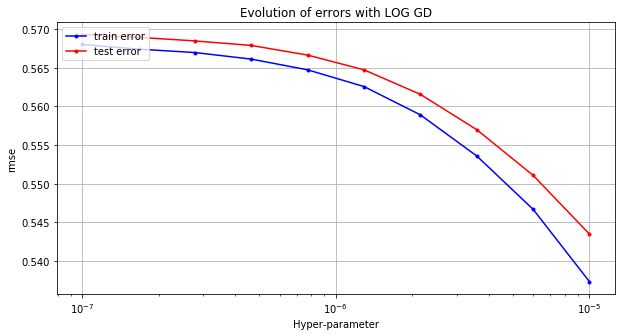

In [88]:
from train_model import *
initial_w = np.zeros(tx_train.shape[1])
max_iter = 500

logistic_stochastic_gradient_descent_exploration(y, tx_train, 0.75, np.logspace(-7, -5, 10),100, initial_w, max_iter)


### Train and Test models on full dataset using cross validation

In [2]:
y_full, tx_full, ids = load_csv_data("data_csv/train.csv", sub_sample=False)
print("y has shape {0}".format(y_full.shape))
print("X has shape {0}".format(tx_full.shape))

y has shape (250000,)
X has shape (250000, 30)


In [3]:
nan_columns_patterns = [0, 4, 23]
features_square = [6]
features_log = [0, 2, 3, 5, 6, 8, 9, 10, 13, 16, 19, 21, 23, 26, 29]
features_sin = [11, 12, 14, 15, 17]
features_std = features_log
features_removed = [14, 15, 17, 18, 20, 22, 25, 28]

In [4]:
def process_feature(tx, nan_columns_patterns, features_square, features_log, 
                    features_sin, features_std, features_removed):
    tx_nan = transform_to_nan(tx_full, -900)

    tx_nan_bool = add_bool_when_nan(tx_nan, nan_columns_patterns)

    tx_nan_mean, mean = transform_to_mean(tx_nan_bool)

    ### Transform to log scale

    tx_square = transform_feature_power(tx_nan_mean, features_square, 2)

    tx_log = transform_feature_log(tx_square, features_log)

    ### Decompose angles
    tx_angle_stand = standardize_angles(tx_log, features_sin)
    tx_sin = transform_feature_sin(tx_angle_stand, features_sin)

    ### Standardize features
    tx_std, mean, std = standardize_features(tx_sin, features_std)

    ### Feature 22
    tx_22plus0 = new_feature_PRI_jet_num(tx_std, 0.0)
    tx_22plus1 = new_feature_PRI_jet_num(tx_22plus0, 1.0)
    tx_22plus2 = new_feature_PRI_jet_num(tx_22plus1, 2.0)
    tx_22plus3 = new_feature_PRI_jet_num(tx_22plus2, 3.0)

    ### Remove useless features
    tx_removed = np.delete(tx_22plus3, features_removed, axis = 1)
    tx_removed.shape
    
    return tx_removed, mean, std

In [5]:
tx_propre, mean_propre, std_propre = process_feature(tx_full,nan_columns_patterns, features_square, features_log, features_sin, features_std, features_removed)
print(tx_propre.shape)

(250000, 29)


In [22]:
from train_model import *
max_iter = 500
initial_w = np.zeros(tx_propre.shape[1])
y_full = change_y_boundaries(y_full)
loss, ws = log_stochastic_gradient_descent(y_full, tx_propre, initial_w, 1, max_iter, 0.0005994842503189409)

SGD(0/499): loss=0.6931471805620133, w0=0.0, w1=0.0
SGD(100/499): loss=0.6290055140187613, w0=0.00045565011584281005, w1=-0.03549865246417503
SGD(200/499): loss=1.3649495138722236, w0=0.004110195106310813, w1=0.027630476164457886
SGD(300/499): loss=0.5921467234887626, w0=0.009412615075338736, w1=-0.030105357495879656
SGD(400/499): loss=0.8492332164635258, w0=0.01341005188465497, w1=0.007582477437667354


In [23]:
ws_best = ws[-1]
ws_best

array([ 0.0178671 , -0.03155153,  0.01290673,  0.0139986 ,  0.04822426,
        0.00420247,  0.01626789,  0.04035399, -0.00398162,  0.01875037,
       -0.02628562, -0.01978232, -0.00091213,  0.02898145, -0.00089463,
        0.00443901,  0.01561418,  0.02222176,  0.00716529,  0.00337495,
       -0.00547842,  0.00448021, -0.00424193,  0.00863868,  0.00573759,
        0.00573759,  0.00290109,  0.00771827,  0.00021109])

In [72]:
tx_propre.shape

(250000, 29)

SGD(0/999): loss=0.6931471805593039, w0=0.0, w1=0.0
SGD(200/999): loss=0.5962846108604756, w0=4.347818715860934e-05, w1=-0.010839093862305613
SGD(400/999): loss=0.5803126501767077, w0=0.00016902105810033806, w1=-0.016927397886707638
SGD(600/999): loss=0.5815671603442328, w0=0.00042677942837186024, w1=-0.015669967446100313
SGD(800/999): loss=0.579378660222466, w0=0.0005867019104586489, w1=-0.018862242085987226
SGD(0/999): loss=0.6931471805593039, w0=0.0, w1=0.0
SGD(200/999): loss=0.5799583026491255, w0=0.00033526827380346347, w1=-0.01723781822450995
SGD(400/999): loss=0.5834367030146363, w0=0.000993974906037209, w1=-0.022736512234480786
SGD(600/999): loss=0.5849178360285722, w0=0.0016710891187625475, w1=-0.023865051715297802
SGD(800/999): loss=0.5811614590452527, w0=0.0023662258144267, w1=-0.02247936743915395
SGD(0/999): loss=0.6931471805593039, w0=0.0, w1=0.0
SGD(200/999): loss=0.6292017148166668, w0=0.0024614963570785925, w1=-0.035091859002015204
SGD(400/999): loss=0.574223157819076, 

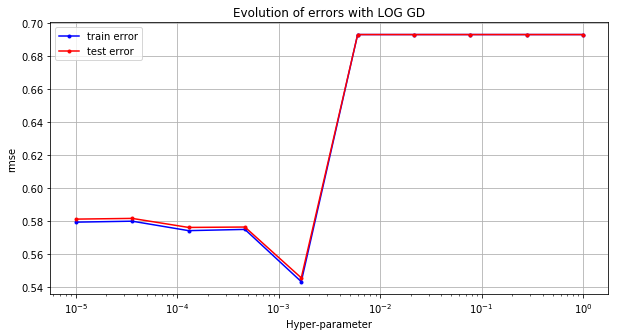

In [28]:
initial_w = np.zeros(tx_propre.shape[1])
max_iter = 1000
logistic_stochastic_gradient_descent_exploration(y_full, tx_propre, 0.8, np.logspace(-5, 0, 10),1, initial_w, max_iter)

Ridge Resgression, Loss : 0.704, Lambda : 0.001


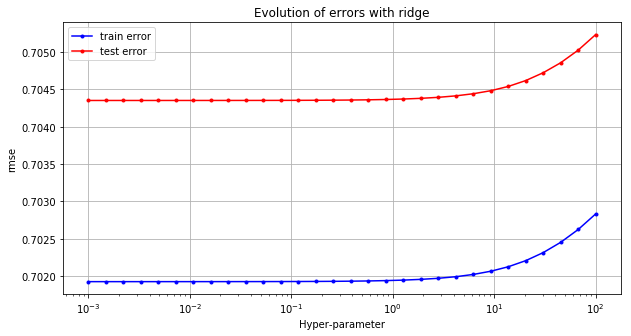

In [72]:
initial_w = np.zeros(tx_propre.shape[1])
ridge_regression_exploration(y_full, tx_propre, 0.8, np.logspace(-3, 2, 30))

Gradient Descent, Loss : 0.744, Lambda : 0.0004832930238571752


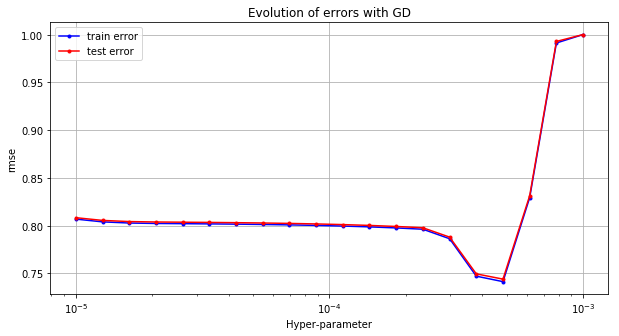

In [77]:
max_iter = 100
initial_w = np.zeros(tx_propre.shape[1])
gradient_descent_exploration(y_full, tx_propre, 0.8, np.logspace(-5, -3, 20), initial_w, max_iter)

Stochastic Gradient Descent, Loss : 0.742, Lambda : 0.00029763514416313193


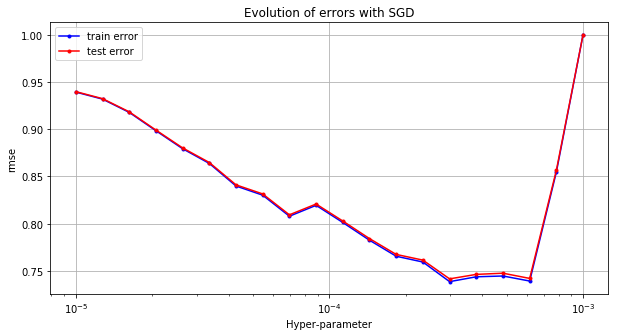

In [76]:
initial_w = np.zeros(tx_propre.shape[1])
max_iter = 10
batch_size = 100
stochastic_gradient_descent_exploration(y_full, tx_propre, 0.8, np.logspace(-5, -3, 20), initial_w, batch_size,  max_iter)

In [82]:
ws_best = ridge_regression(y_full, tx_propre, 1e-3)
ws_best

array([ 1.03727253e-01, -5.80831070e-03, -1.50906311e-01,  4.66496587e-02,
        2.60384150e-01, -1.66038192e-01,  4.54838846e-02,  1.70468774e-01,
       -1.88877204e-02,  9.55306162e-02, -1.03271717e-01, -1.11189230e-01,
       -1.57619722e-01,  1.33326291e-01,  7.22649202e-02, -1.70236508e-02,
        3.51505769e-03,  4.92351781e-02,  4.78304854e-05,  6.04541596e-02,
        1.45648876e-03,  1.66638836e-01, -1.59835840e-01, -5.41921616e-01,
       -8.11115544e-02, -8.11115526e-02, -4.60810273e-01, -1.31934578e+00,
       -1.63470762e+00])

### Prediction Accuracy

In [84]:
def prediction(x, y, split, max_iters, gamma, type_func):
    #split data
    x_tr,x_te,y_tr,y_te=split_data(x,y,split)

    if(type_func == 'gd'):
        initial_w_gd = np.zeros(x.shape[1])
        losses, ws = gradient_descent(y_tr, x_tr, initial_w_gd, max_iters, gamma)
    elif(type_func == 'sgd'):
        initial_w_sgd = np.zeros(x.shape[1])
        losses, ws = stochastic_gradient_descent(y_tr, x_tr, initial_w_sgd, 10, max_iters, gamma)
    elif(type_func == 'ls'):
        ws = least_squares(y, x)
        losses = compute_loss(y, x, ws)
    elif(type_func == 'ridge'):
        #lambdas = np.logspace(-100, 100, 200)
        #losses = []
        #for index, lambda_ in enumerate(lambdas):
            #ws = ridge_regression(y, x, lambda_)
            #losses.append(compute_loss(y, x, ws))
        lambdas = np.logspace(-100, 100, 200)
        losses = []
        ws = []
        for index, lambda_ in enumerate(lambdas):
            ws.append(ridge_regression(y, x, lambda_))
            losses.append(compute_loss(y, x, ws[index]))
       
    #losses
    l,wnew=minimum_loss_vector(losses, ws)

    #predictions
    y_pred=predict_labels(wnew, x_tr)

    #accuracy
    print(accuracy_calculator(y_pred, y_tr))

In [85]:
prediction(tx_propre, y_full, 0.8, 100, 0.1e-3, 'ridge')

0.75226


# Load Kaggle Test Set

### Perform features transformation

In [24]:
y_test, tx_test, ids_test = load_csv_data("data_csv/test.csv", sub_sample=False)
print("y has shape {0}".format(y_test.shape))
print("X has shape {0}".format(tx_test.shape))

tx_nan = transform_to_nan(tx_test, -900)

nan_columns_patterns = [0, 4, 23]
tx_nan_bool = add_bool_when_nan(tx_nan, nan_columns_patterns)

tx_nan_mean, mean = transform_to_mean(tx_nan_bool)

### Transform to log scale

features_square = [6]
tx_square = transform_feature_power(tx_nan_mean, features_square, 2)

features_log = [0, 2, 3, 5, 6, 8, 9, 10, 13, 16, 19, 21, 23, 26, 29]
tx_log = transform_feature_log(tx_square, features_log)

### Decompose angles
features_sin = [11, 12, 14, 15, 17]
tx_angle_stand = standardize_angles(tx_log, features_sin)
tx_sin = transform_feature_sin(tx_angle_stand, features_sin)



### Standardize features
feature_std = features_log
tx_std = standardize_features_according_to_train_set(tx_sin, feature_std, mean_propre, std_propre)

### Feature 22
tx_22plus0 = new_feature_PRI_jet_num(tx_std, 0.0)
tx_22plus1 = new_feature_PRI_jet_num(tx_22plus0, 1.0)
tx_22plus2 = new_feature_PRI_jet_num(tx_22plus1, 2.0)
tx_22plus3 = new_feature_PRI_jet_num(tx_22plus2, 3.0)

### Remove useless features
features_removed = [14, 15, 17, 18, 20, 22, 25, 28]
tx_removed = np.delete(tx_22plus3, features_removed, axis = 1)
tx_removed.shape


y has shape (568238,)
X has shape (568238, 30)


(568238, 29)

### Predict labels and Create CSV file

In [25]:
y_pred = predict_labels_logi(ws_best, tx_removed)
create_csv_submission(ids_test, y_pred, 'Thirds_try')

In [26]:
np.count_nonzero(y_pred==1)


929